Author: Kostya Malanchev, Neven Caplar and the LINCC Frameworks team

Last updated: November 13, 2025

# Problem 2

## Compare with spectroscopic DESI redshifts

Let's compare photometric redshifts with spectroscopic ones. Crossmatch with DESI spectroscopical redshift catalog that covers the southern sky (available at https://data.lsdb.io/#DESI/DESI_DR1_(z-catalog)) and plot the results of any photo-z method compared with spectroscopical redshifts.

# Solution 2

In [1]:
import lsdb
import matplotlib.pyplot as plt

In [2]:
# we open catalog from the main notebook
dp1_pz_catalog = lsdb.open_catalog('/rubin/lsdb_data/object_photoz/')

In [3]:
# we open the remote catalog and do a simple crossmatch
desi_specz_catalog = lsdb.open_catalog("https://data.lsdb.io/hats/desi/desi_dr1_zcat")
xmatch = desi_specz_catalog.crossmatch(dp1_pz_catalog, radius_arcsec=0.25).compute()
xmatch

/opt/lsst/software/stack/conda/envs/lsst-scipipe-12.0.0/lib/python3.13/site-packages/lsdb/catalog/catalog.py:256: FutureWarning: The default suffix behavior will change from applying suffixes to all columns to only applying suffixes to overlapping columns in a future release.To maintain the current behavior, explicitly set `suffix_method='all_columns'`. To change to the new behavior, set `suffix_method='overlapping_columns'`.
  warnings.warn(
/opt/lsst/software/stack/conda/envs/lsst-scipipe-12.0.0/lib/python3.13/site-packages/lsdb/dask/crossmatch_catalog_data.py:160: RuntimeWarning: Right catalog does not have a margin cache. Results may be incomplete and/or inaccurate.
  warnings.warn(


,TARGETID_desi_dr1_zcat,SURVEY_desi_dr1_zcat,PROGRAM_desi_dr1_zcat,HEALPIX_desi_dr1_zcat,SPGRPVAL_desi_dr1_zcat,Z_desi_dr1_zcat,ZERR_desi_dr1_zcat,ZWARN_desi_dr1_zcat,CHI2_desi_dr1_zcat,COEFF_desi_dr1_zcat,NPIXELS_desi_dr1_zcat,SPECTYPE_desi_dr1_zcat,SUBTYPE_desi_dr1_zcat,NCOEFF_desi_dr1_zcat,DELTACHI2_desi_dr1_zcat,COADD_FIBERSTATUS_desi_dr1_zcat,TARGET_RA_desi_dr1_zcat,TARGET_DEC_desi_dr1_zcat,PMRA_desi_dr1_zcat,PMDEC_desi_dr1_zcat,REF_EPOCH_desi_dr1_zcat,FA_TARGET_desi_dr1_zcat,FA_TYPE_desi_dr1_zcat,OBJTYPE_desi_dr1_zcat,SUBPRIORITY_desi_dr1_zcat,OBSCONDITIONS_desi_dr1_zcat,RELEASE_desi_dr1_zcat,BRICKNAME_desi_dr1_zcat,BRICKID_desi_dr1_zcat,BRICK_OBJID_desi_dr1_zcat,MORPHTYPE_desi_dr1_zcat,EBV_desi_dr1_zcat,FLUX_G_desi_dr1_zcat,FLUX_R_desi_dr1_zcat,FLUX_Z_desi_dr1_zcat,FLUX_W1_desi_dr1_zcat,FLUX_W2_desi_dr1_zcat,FLUX_IVAR_G_desi_dr1_zcat,FLUX_IVAR_R_desi_dr1_zcat,FLUX_IVAR_Z_desi_dr1_zcat,FLUX_IVAR_W1_desi_dr1_zcat,FLUX_IVAR_W2_desi_dr1_zcat,FIBERFLUX_G_desi_dr1_zcat,FIBERFLUX_R_desi_dr1_zcat,FIBERFLUX_Z_desi_dr1_zcat,FIBERTOTFLUX_G_desi_dr1_zcat,FIBERTOTFLUX_R_desi_dr1_zcat,FIBERTOTFLUX_Z_desi_dr1_zcat,MASKBITS_desi_dr1_zcat,SERSIC_desi_dr1_zcat,SHAPE_R_desi_dr1_zcat,SHAPE_E1_desi_dr1_zcat,SHAPE_E2_desi_dr1_zcat,REF_ID_desi_dr1_zcat,REF_CAT_desi_dr1_zcat,GAIA_PHOT_G_MEAN_MAG_desi_dr1_zcat,GAIA_PHOT_BP_MEAN_MAG_desi_dr1_zcat,GAIA_PHOT_RP_MEAN_MAG_desi_dr1_zcat,PARALLAX_desi_dr1_zcat,PHOTSYS_desi_dr1_zcat,PRIORITY_INIT_desi_dr1_zcat,NUMOBS_INIT_desi_dr1_zcat,CMX_TARGET_desi_dr1_zcat,DESI_TARGET_desi_dr1_zcat,BGS_TARGET_desi_dr1_zcat,MWS_TARGET_desi_dr1_zcat,SCND_TARGET_desi_dr1_zcat,SV1_DESI_TARGET_desi_dr1_zcat,SV1_BGS_TARGET_desi_dr1_zcat,SV1_MWS_TARGET_desi_dr1_zcat,SV1_SCND_TARGET_desi_dr1_zcat,SV2_DESI_TARGET_desi_dr1_zcat,SV2_BGS_TARGET_desi_dr1_zcat,SV2_MWS_TARGET_desi_dr1_zcat,SV2_SCND_TARGET_desi_dr1_zcat,SV3_DESI_TARGET_desi_dr1_zcat,SV3_BGS_TARGET_desi_dr1_zcat,SV3_MWS_TARGET_desi_dr1_zcat,SV3_SCND_TARGET_desi_dr1_zcat,PLATE_RA_desi_dr1_zcat,PLATE_DEC_desi_dr1_zcat,COADD_NUMEXP_desi_dr1_zcat,COADD_EXPTIME_desi_dr1_zcat,COADD_NUMNIGHT_desi_dr1_zcat,COADD_NUMTILE_desi_dr1_zcat,MEAN_DELTA_X_desi_dr1_zcat,RMS_DELTA_X_desi_dr1_zcat,MEAN_DELTA_Y_desi_dr1_zcat,RMS_DELTA_Y_desi_dr1_zcat,MEAN_PSF_TO_FIBER_SPECFLUX_desi_dr1_zcat,MEAN_FIBER_RA_desi_dr1_zcat,STD_FIBER_RA_desi_dr1_zcat,MEAN_FIBER_DEC_desi_dr1_zcat,STD_FIBER_DEC_desi_dr1_zcat,MIN_MJD_desi_dr1_zcat,MAX_MJD_desi_dr1_zcat,MEAN_MJD_desi_dr1_zcat,TSNR2_GPBDARK_B_desi_dr1_zcat,TSNR2_ELG_B_desi_dr1_zcat,TSNR2_GPBBRIGHT_B_desi_dr1_zcat,TSNR2_LYA_B_desi_dr1_zcat,TSNR2_BGS_B_desi_dr1_zcat,TSNR2_GPBBACKUP_B_desi_dr1_zcat,TSNR2_QSO_B_desi_dr1_zcat,TSNR2_LRG_B_desi_dr1_zcat,TSNR2_GPBDARK_R_desi_dr1_zcat,TSNR2_ELG_R_desi_dr1_zcat,TSNR2_GPBBRIGHT_R_desi_dr1_zcat,TSNR2_LYA_R_desi_dr1_zcat,TSNR2_BGS_R_desi_dr1_zcat,TSNR2_GPBBACKUP_R_desi_dr1_zcat,TSNR2_QSO_R_desi_dr1_zcat,TSNR2_LRG_R_desi_dr1_zcat,TSNR2_GPBDARK_Z_desi_dr1_zcat,TSNR2_ELG_Z_desi_dr1_zcat,TSNR2_GPBBRIGHT_Z_desi_dr1_zcat,TSNR2_LYA_Z_desi_dr1_zcat,TSNR2_BGS_Z_desi_dr1_zcat,TSNR2_GPBBACKUP_Z_desi_dr1_zcat,TSNR2_QSO_Z_desi_dr1_zcat,TSNR2_LRG_Z_desi_dr1_zcat,TSNR2_GPBDARK_desi_dr1_zcat,TSNR2_ELG_desi_dr1_zcat,TSNR2_GPBBRIGHT_desi_dr1_zcat,TSNR2_LYA_desi_dr1_zcat,TSNR2_BGS_desi_dr1_zcat,TSNR2_GPBBACKUP_desi_dr1_zcat,TSNR2_QSO_desi_dr1_zcat,TSNR2_LRG_desi_dr1_zcat,MAIN_NSPEC_desi_dr1_zcat,MAIN_PRIMARY_desi_dr1_zcat,SV_NSPEC_desi_dr1_zcat,SV_PRIMARY_desi_dr1_zcat,ZCAT_NSPEC_desi_dr1_zcat,ZCAT_PRIMARY_desi_dr1_zcat,DESINAME_desi_dr1_zcat,coord_dec_object_photoz,coord_ra_object_photoz,g_cModelMag_object_photoz,g_cModelMagErr_object_photoz,g_gaap1p0Mag_object_photoz,g_gaap1p0MagErr_object_photoz,g_gaap3p0Mag_object_photoz,g_gaap3p0MagErr_object_photoz,g_kronMag_object_photoz,g_kronMagErr_object_photoz,g_psfMag_object_photoz,g_psfMagErr_object_photoz,g_sersicMag_object_photoz,g_sersicMagErr_object_photoz,i_cModelMag_object_photoz,i_cModelMagErr_object_photoz,i_gaap1p0Mag_object_photoz,i_gaap1p0MagErr_object_photoz,i_gaap3p0Ma

Right catalog does not have margin! Do you remember what does that mean (Extra topic in Notebook 1!)

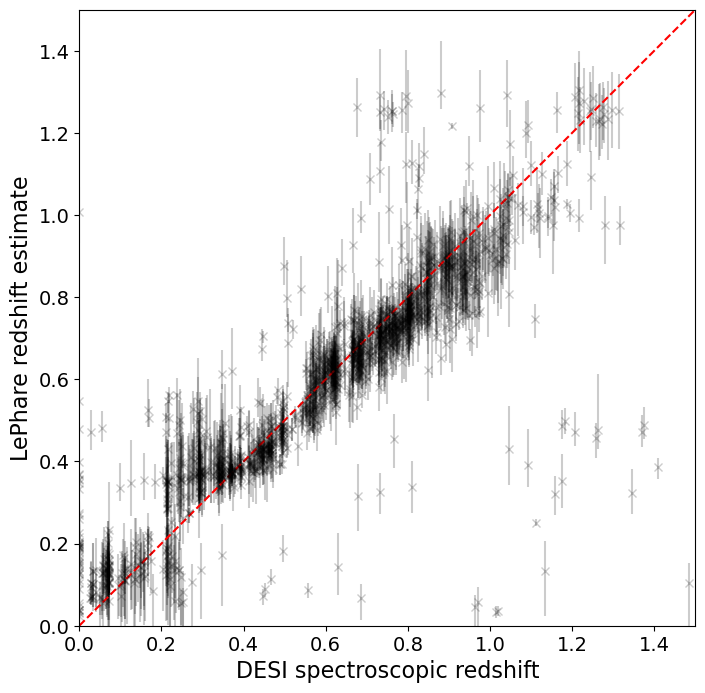

In [4]:
plt.figure(figsize=(8, 8))

# Filter out object for which lephare has wide spread 
low_error = xmatch.query("lephare_z_err68_high_object_photoz - lephare_z_err68_low_object_photoz < 0.2")

# Plot with errorbars
plt.errorbar(
    x=low_error["Z_desi_dr1_zcat"],
    y=low_error["lephare_z_median_object_photoz"],
    yerr=[
        low_error["lephare_z_err68_high_object_photoz"] - low_error["lephare_z_median_object_photoz"],
        low_error["lephare_z_median_object_photoz"] - low_error["lephare_z_err68_low_object_photoz"],
    ],
    fmt="x",
    color="black",
    alpha=0.2,
)

# Set equal aspect ratio
plt.gca().set_aspect("equal", adjustable="box")

# Plot reference y=x line
plt.plot([0, 1.5], [0, 1.5], color="red", ls="--")

# Set axis limits
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])

# Set axis labels with larger font size and descriptions
plt.xlabel("DESI spectroscopic redshift", fontsize=16)
plt.ylabel("LePhare redshift estimate", fontsize=16)

# Make tick labels larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()